In [159]:
import idx2numpy

In [160]:
TRAIN_IMG_FILENAME = './data/train-images.idx3-ubyte'
TRAIN_LABEL_FILENAME = './data/train-labels.idx1-ubyte'
TEST_IMG_FILENAME = './data/t10k-images.idx3-ubyte'
TEST_LABEL_FILENAME = './data/t10k-labels.idx1-ubyte'

In [161]:
# READ FILES
train_images = idx2numpy.convert_from_file(TRAIN_IMG_FILENAME)
train_labels = idx2numpy.convert_from_file(TRAIN_LABEL_FILENAME)
test_images = idx2numpy.convert_from_file(TEST_IMG_FILENAME)
test_labels = idx2numpy.convert_from_file(TEST_LABEL_FILENAME)
#PRINT DIMENSIONS
print(f'dimensions of train_images: {train_images.shape}')
print(f'dimensions of train_labels: {train_labels.shape}')
print(f'dimensions of test_images: {test_images.shape}')
print(f'dimensions of test_labels: {test_labels.shape}')

dimensions of train_images: (60000, 28, 28)
dimensions of train_labels: (60000,)
dimensions of test_images: (10000, 28, 28)
dimensions of test_labels: (10000,)


In [162]:
# PRINT SINGLE ELEMENT OF THE TRAINING SET
print('Label: ', train_labels[1])
print('='*80)
for line in train_images[1]:
    for num in line:
        if num > 0:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print('')
print('='*80)

Label:  0
                                                        
                                                        
                                                        
                                                        
                              * * * * *                 
                            * * * * * *                 
                          * * * * * * * * *             
                      * * * * * * * * * * *             
                      * * * * * * * * * * *             
                    * * * * * * * * * * * *             
                  * * * * * * * * *     * * *           
                * * * * * *             * * *           
              * * * * * * *             * * *           
              * * * *                   * * *           
              * * *                     * * *           
            * * * *                     * * *           
            * * * *                 * * * * *           
            * * *    

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

np.random.seed(13)
LEARNING_RATE = 0.01
EPOCHS = 20

In [164]:
paths = {
    'path_train_x': './data/train-images.idx3-ubyte', 
    'path_train_y': './data/train-labels.idx1-ubyte', 
    'path_test_x': './data/t10k-images.idx3-ubyte', 
    'path_test_y': './data/t10k-labels.idx1-ubyte'
    }


In [165]:
def read_mnist(path_train_x, path_train_y, path_test_x, path_test_y):
    train_images = idx2numpy.convert_from_file(path_train_x)
    train_labels = idx2numpy.convert_from_file(path_train_y)
    test_images = idx2numpy.convert_from_file(path_test_x)
    test_labels = idx2numpy.convert_from_file(path_test_y)

    x_train = train_images.reshape(60000, 784)
    mean = np.mean(x_train)
    stddev = np.std(x_train)
    x_train = (x_train-mean)/stddev
    x_test = test_images.reshape(10000, 784)
    x_test = (x_test-mean)/stddev
    
    y_train = np.zeros((60000, 10))
    y_test = np.zeros((10000, 10))
    for i, y in enumerate(train_labels):
        y_train[i][y] = 1
    for i, y in enumerate(test_labels):
        y_test[i][y] = 1
    return x_train, y_train, x_test, y_test

In [166]:
x_train, y_train, x_test, y_test = read_mnist(**paths)
index_list = list(range(len(x_train)))

In [167]:
def layer_w(n_neurons, n_input):
    weights = np.zeros((n_neurons, n_input+1))
    for i in range(n_neurons):
        for j in range(1, (n_input+1)):
            weights[i][j] = np.random.uniform(-0.1,0.1)
    return weights

In [168]:
hidden_layer_w = layer_w(25,784)
hidden_layer_y = np.zeros(25)
hidden_layer_error = np.zeros(25)

output_layer_w = layer_w(10,25)
output_layer_y = np.zeros(10)
output_layer_error = np.zeros(10)

In [169]:
chart_x = []
chart_y_train = []
chart_y_test = []
def show_learning(n_epoch, train_accuracy, test_accuracy):
    global chart_x
    global chart_y_train
    global chart_y_train
    print(f'epoch №: {n_epoch} train_accuracy: {train_accuracy} test_accuracy: {test_accuracy}')
    chart_x.append(n_epoch+1)
    chart_y_train.append(1.0-train_accuracy)
    chart_y_test.append(1.0-test_accuracy)
    
def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-', label='training error')
    plt.plot(chart_x, chart_y_test, 'b-', label='testing error')
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()

In [170]:
def forward_pass(x):
    global hidden_layer_y
    global output_layer_y
    for i, w in enumerate(hidden_layer_w):
        z = np.dot(w,x)
        hidden_layer_y[i] = np.tanh(z)
    hidden_output_array = np.concatenate((np.array([1.0]), hidden_layer_y))

    for i, w in enumerate(output_layer_w):
        z = np.dot(w,hidden_output_array)
        output_layer_y[i] = 1.0 / (1.0 + np.exp(-z))

def backward_pass(y_truth):
    global hidden_layer_error
    global output_layer_error
    for i, y in enumerate(output_layer_y):
        error_prime = -(y_truth[i]-y)
        derivative = y * (1.0 - y)
        output_layer_error[i] = error_prime * derivative
    for i, y in enumerate(hidden_layer_y):
        error_weights = []
        for w in output_layer_w:
            error_weights.append(w[i+1])
        error_weight_array = np.array(error_weights)

        derivative = 1.0 - y**2
        weighted_error = np.dot(error_weight_array, output_layer_error)
        hidden_layer_error[i] = weighted_error * derivative

def adjust_weights(x):
    global output_layer_w
    global hidden_layer_w
    for i, error in enumerate(hidden_layer_error):
        hidden_layer_w[i] -= (x*LEARNING_RATE*error)
    hidden_output_array = np.concatenate((np.array([1.0]), hidden_layer_y))
    for i, error in enumerate(output_layer_error):
        output_layer_w[i] -= (hidden_output_array*LEARNING_RATE*error)

epoch №: 0 train_accuracy: 0.8601333333333333 test_accuracy: 0.9148
epoch №: 1 train_accuracy: 0.9179166666666667 test_accuracy: 0.9187
epoch №: 2 train_accuracy: 0.92525 test_accuracy: 0.9259
epoch №: 3 train_accuracy: 0.9311 test_accuracy: 0.9301
epoch №: 4 train_accuracy: 0.9345666666666667 test_accuracy: 0.9299
epoch №: 5 train_accuracy: 0.93705 test_accuracy: 0.9295
epoch №: 6 train_accuracy: 0.9391166666666667 test_accuracy: 0.9342
epoch №: 7 train_accuracy: 0.9411666666666667 test_accuracy: 0.9349
epoch №: 8 train_accuracy: 0.9430166666666666 test_accuracy: 0.9331
epoch №: 9 train_accuracy: 0.94465 test_accuracy: 0.9364
epoch №: 10 train_accuracy: 0.9464833333333333 test_accuracy: 0.9343
epoch №: 11 train_accuracy: 0.9465333333333333 test_accuracy: 0.9343
epoch №: 12 train_accuracy: 0.9476833333333333 test_accuracy: 0.9375
epoch №: 13 train_accuracy: 0.9483333333333334 test_accuracy: 0.9388
epoch №: 14 train_accuracy: 0.9495166666666667 test_accuracy: 0.9373
epoch №: 15 train_ac

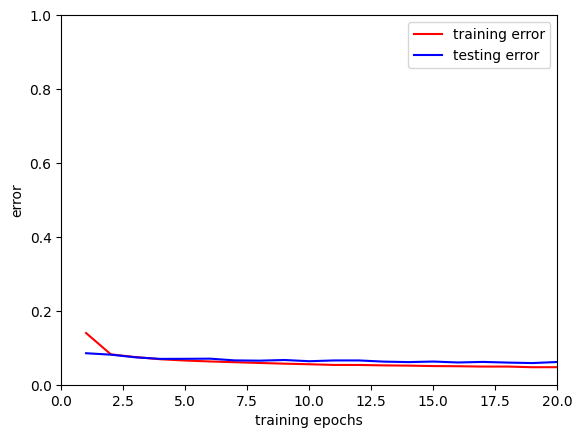

In [171]:
for i in range(EPOCHS):
    np.random.shuffle(index_list)
    correct_training_results = 0
    for j in index_list:
        x = np.concatenate((np.array([1.0]), x_train[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_train[j].argmax():
            correct_training_results += 1
        backward_pass(y_train[j])
        adjust_weights(x)
    correct_test_results = 0

    for j in range(len(x_test)):
        x = np.concatenate((np.array([1.0]), x_test[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_test[j].argmax():
            correct_test_results += 1
    show_learning(i, correct_training_results/len(x_train), correct_test_results/len(x_test))
plot_learning()